In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Regression of model

In [ ]:
df=pd.read_csv('/content/Salary_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [ ]:
df.isna().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [ ]:
df.dtypes

,0
YearsExperience,float64
Salary,float64


In [ ]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

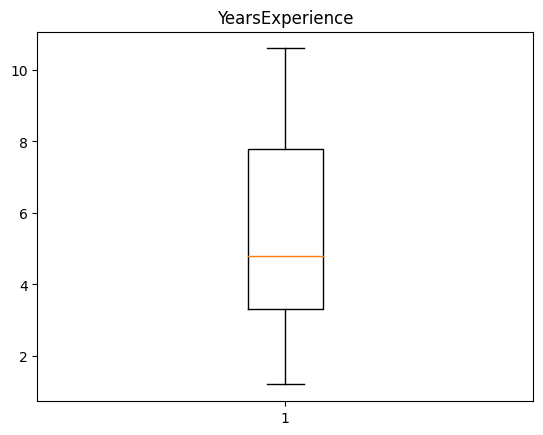

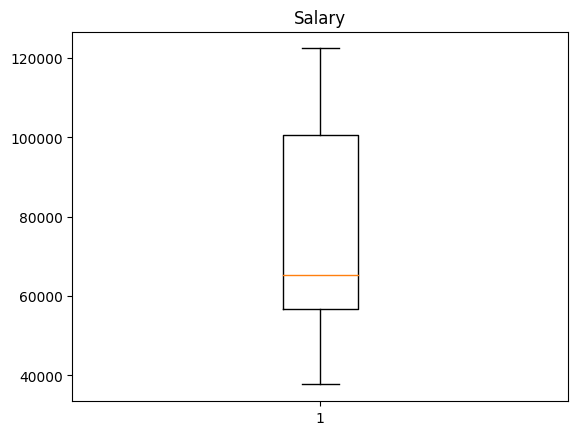

In [ ]:
for i in ['YearsExperience', 'Salary']:
  plt.figure()
  plt.boxplot(df[i])
  plt.title(i)

In [ ]:
x=df[['YearsExperience']]
y=df[['Salary']]

In [ ]:
#linear regression

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()


In [ ]:
model=lr.fit(x_train,y_train)


In [ ]:
pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print ('mse= ',mean_squared_error(y_test,pred))

mse=  49830096.855908394


In [ ]:
from sklearn.metrics import mean_absolute_error
print ('mae= ',mean_absolute_error(y_test,pred))

mae=  6286.453830757745


In [ ]:
from sklearn.metrics import r2_score
print ('r2_score=',r2_score(y_test,pred))

r2_score= 0.9024461774180497


In [ ]:
#polynomial regression

In [ ]:
#fitting polynomial regression to datas set
from sklearn.preprocessing import PolynomialFeatures

#transform data for pol.reg
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)
#to fit to lin.reg to predict as ploy.reg cant predict
lr2=LinearRegression()
lr2.fit(x_train_poly,y_train)   #model training/learning happens here


LinearRegression()

In [ ]:
y_pred_poly=lr2.predict(x_test_poly)

In [ ]:
mean_squared_error(y_test,y_pred_poly)

52527916.3687748

In [ ]:
mean_absolute_error(y_test,y_pred_poly)

6381.371429702194

In [ ]:
r2_score(y_test,y_pred_poly)

0.8971645780890873

In [ ]:
#Classification model

In [6]:
df =pd.read_csv('/content/loan_data.csv')

In [7]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758.0,CIB,25-34,to_inst,98.728814,south,direct,1.0,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552.0,EXP,55-64,to_inst,NaN,North,direct,1.0,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834.0,CIB,35-44,to_inst,80.019685,south,direct,0.0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587.0,CIB,45-54,not_inst,69.376900,North,direct,0.0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602.0,EXP,25-34,not_inst,91.886544,North,direct,0.0,39.0


In [8]:
df.isna().sum()

,0
ID,0
year,0
loan_limit,376
Gender,0
approv_in_adv,100
loan_type,1
loan_purpose,13
Credit_Worthiness,1
open_credit,1
business_or_commercial,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17186 entries, 0 to 17185
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         17186 non-null  int64  
 1   year                       17186 non-null  int64  
 2   loan_limit                 16810 non-null  object 
 3   Gender                     17186 non-null  object 
 4   approv_in_adv              17086 non-null  object 
 5   loan_type                  17185 non-null  object 
 6   loan_purpose               17173 non-null  object 
 7   Credit_Worthiness          17185 non-null  object 
 8   open_credit                17185 non-null  object 
 9   business_or_commercial     17185 non-null  object 
 10  loan_amount                17185 non-null  float64
 11  rate_of_interest           12988 non-null  float64
 12  Interest_rate_spread       12966 non-null  float64
 13  Upfront_charges            12633 non-null  flo

In [10]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

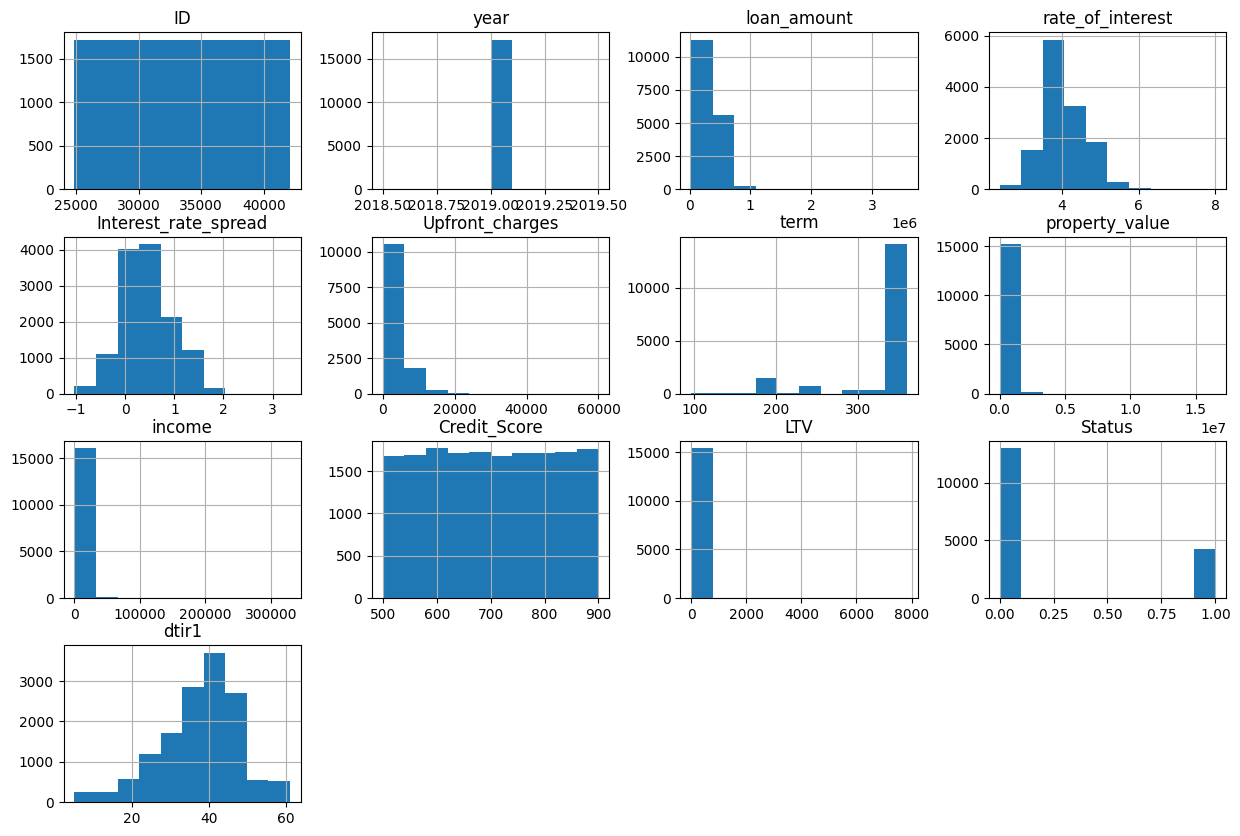

In [11]:
#histogram
df.hist(figsize=(15,10))
plt.show()

In [12]:
 #missing values handling
for col in ['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status', 'dtir1']:
    if df[col].dtype == 'object':

        df[col] = df[col].fillna(df[col].mode()[0])  # Fill with most frequent value
    else:
        # Handle numeric columns
        df[col] = df[col].fillna(df[col].median())

In [13]:
df.isna().sum()

,0
ID,0
year,0
loan_limit,0
Gender,0
approv_in_adv,0
loan_type,0
loan_purpose,0
Credit_Worthiness,0
open_credit,0
business_or_commercial,0


In [14]:


obj_cols = df.select_dtypes(include='object').columns
print(obj_cols)


Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type'],
      dtype='object')


In [15]:


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'Region', 'Security_Type']:
    df[col] = label_encoder.fit_transform(df[col])

    #label encoding is done here


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17186 entries, 0 to 17185
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         17186 non-null  int64  
 1   year                       17186 non-null  int64  
 2   loan_limit                 17186 non-null  int64  
 3   Gender                     17186 non-null  int64  
 4   approv_in_adv              17186 non-null  int64  
 5   loan_type                  17186 non-null  int64  
 6   loan_purpose               17186 non-null  int64  
 7   Credit_Worthiness          17186 non-null  int64  
 8   open_credit                17186 non-null  int64  
 9   business_or_commercial     17186 non-null  int64  
 10  loan_amount                17186 non-null  float64
 11  rate_of_interest           17186 non-null  float64
 12  Interest_rate_spread       17186 non-null  float64
 13  Upfront_charges            17186 non-null  flo